In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pickle

In [17]:
def plot_learning_curve(loss_record, title=''):
    ''' Plot learning curve of your DNN (train & dev loss) '''
    total_steps = len(loss_record['att_h_train'])
    x_1 = range(total_steps)
    x_2 = x_1[::len(loss_record['att_h_train']) // len(loss_record['att_h_val'])]
    figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['att_h_train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['att_h_val'], c='tab:cyan', label='dev')
    plt.ylim(10.0**11, 10.0**12)
    plt.xlabel('Training steps')
    plt.ylabel('MSE loss')
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()


def plot_pred(dv_set, model, device, lim=35., preds=None, targets=None):
    ''' Plot prediction of your DNN '''
    if preds is None or targets is None:
        model.eval()
        preds, targets = [], []
        for x, y in dv_set:
            x, y = x.to(device), y.to(device)
            with torch.no_grad():
                pred = model(x)
                preds.append(pred.detach().cpu())
                targets.append(y.detach().cpu())
        preds = torch.cat(preds, dim=0).numpy()
        targets = torch.cat(targets, dim=0).numpy()

    figure(figsize=(5, 5))
    plt.scatter(targets, preds, c='r', alpha=0.5)
    plt.plot([-0.2, lim], [-0.2, lim], c='b')
    plt.xlim(-0.2, lim)
    plt.ylim(-0.2, lim)
    plt.xlabel('ground truth value')
    plt.ylabel('predicted value')
    plt.title('Ground Truth v.s. Prediction')
    plt.show()   

In [9]:
with open('loss_record/ast_model_2000_500_0.001.pickle','rb') as fr:
    loss_record = pickle.load(fr)

In [7]:
loss_r.keys()

dict_keys(['rel_train', 'rel_valid', 'att_h_train', 'att_t_train', 'att_h_val', 'att_t_val', 'ast_train'])

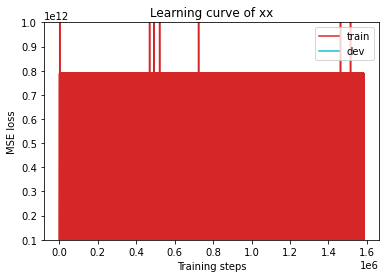

In [18]:
plot_learning_curve(loss_record, title='xx')